# Análise exploratória dos atributos categóricos

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(777)

df = pd.read_csv('../data/students.csv')

X = df.loc[:, df.columns != 'Target']
y = df['Target']

In [5]:
nominal = ['Marital status', 
            'Application mode', 
            'Course',
            'Daytime/evening attendance', 
            'Previous qualification', 
            'Nacionality',
            'Mother\'s qualification', 
            'Father\'s qualification',
            'Mother\'s occupation', 
            'Father\'s occupation', 
            'Displaced',
            'Educational special needs', 
            'Debtor', 
            'Tuition fees up to date',
            'Gender', 
            'Scholarship holder', 
            'International',]        

ordinais = ['Application order']  

## Nominais

In [6]:
X_n = X[nominal]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, train_size=0.8, stratify=y, random_state=777)

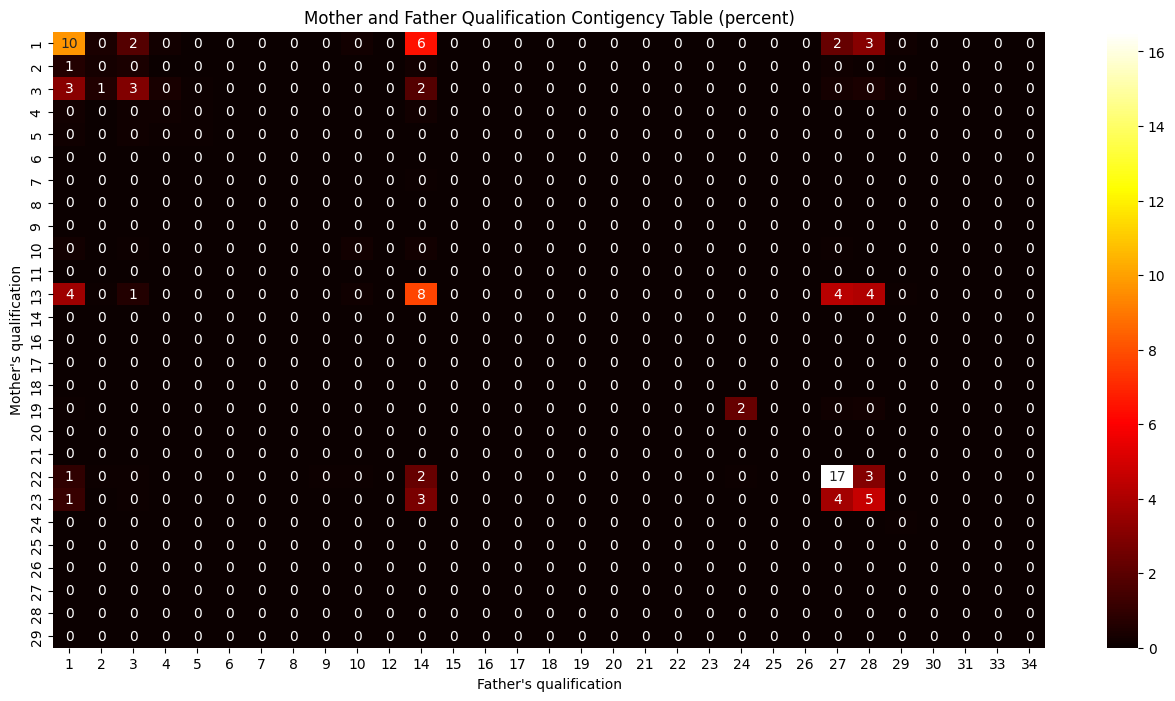

In [23]:
MF_quali_contigency = pd.crosstab(X_train['Mother\'s qualification'], X_train['Father\'s qualification'])
row_totals = MF_quali_contigency.sum(axis=1)
col_totals = MF_quali_contigency.sum(axis=0)
total = MF_quali_contigency.sum().sum()

# Converter valores em porcentagem
MF_quali_contigency_percent = (MF_quali_contigency / total) * 100

plt.figure(figsize=(16,8))
sns.heatmap(MF_quali_contigency_percent, annot=True, cmap='hot', fmt='.0f')
plt.title('Mother and Father Qualification Contigency Table (percent)')
plt.show()

In [27]:
chi2, p, dof, expected = chi2_contingency(MF_quali_contigency)
print("Chi-square statistic:", chi2)
print('dof:', dof)
#print('expected:', expected)
print("P-value:", p)

Chi-square statistic: 18110.687904435188
dof: 780
P-value: 0.0


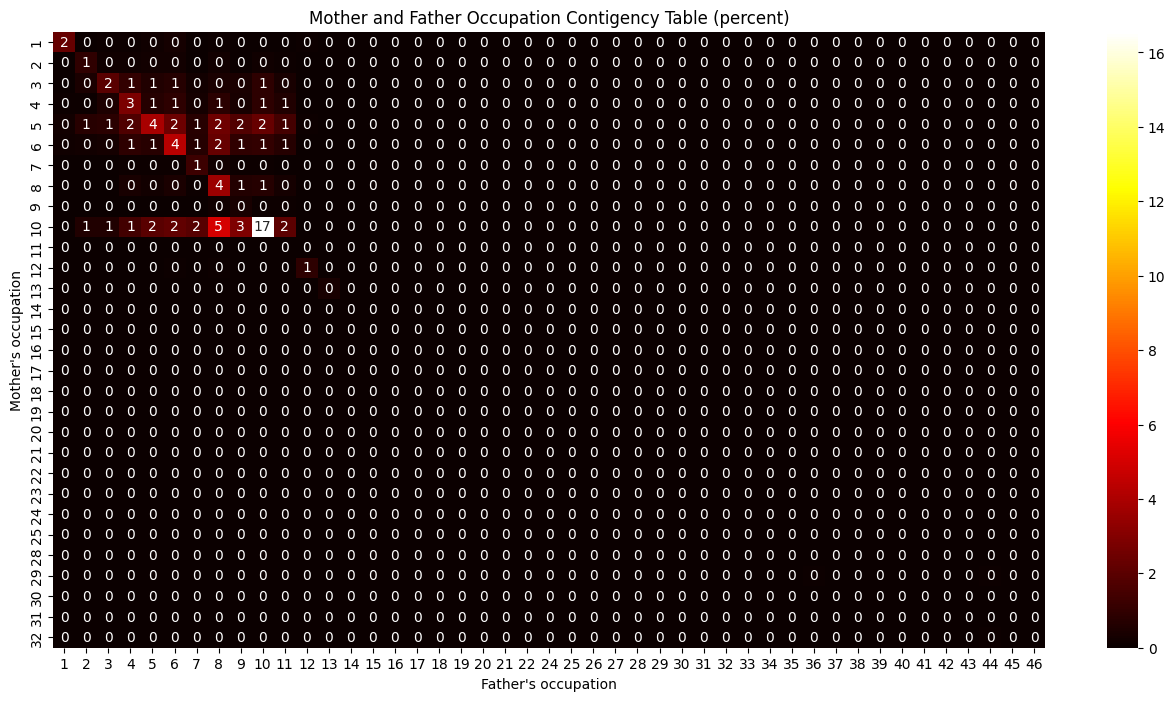

In [24]:
MF_occu_contigency = pd.crosstab(X_train['Mother\'s occupation'], X_train['Father\'s occupation'])
row_totals = MF_occu_contigency.sum(axis=1)
col_totals = MF_occu_contigency.sum(axis=0)
total = MF_occu_contigency.sum().sum()

# Converter valores em porcentagem
MF_occu_contigency_percent = (MF_occu_contigency / total) * 100

plt.figure(figsize=(16,8))
sns.heatmap(MF_occu_contigency_percent, annot=True, cmap='hot', fmt='.0f')
plt.title('Mother and Father Occupation Contigency Table (percent)')
plt.show()

In [28]:
chi2, p, dof, expected = chi2_contingency(MF_occu_contigency)
print("Chi-square statistic:", chi2)
print('dof:', dof)
#print('expected:', expected)
print("P-value:", p)

Chi-square statistic: 39287.64085126776
dof: 1276
P-value: 0.0
